<a href="https://colab.research.google.com/github/HammadN98/Formacao_MachineLearning_Specialist/blob/main/Projeto_DIO_TransferingLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from keras import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import zipfile
import numpy as np






In [ ]:
#montando o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Descompactando o arquivo
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dataset/cat_dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

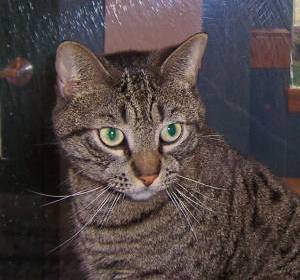

In [ ]:
#Plotando uma imagem do dataset de treino, para verificar as imagens
tf.keras.preprocessing.image.load_img('/content/cat_dog/training_set/cat/cat.1.jpg')

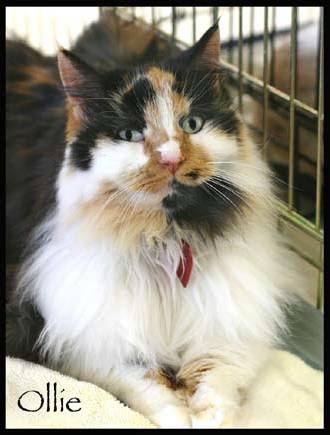

In [ ]:
#Plotando uma imagem do dataset de test, para verificar as imagens
tf.keras.preprocessing.image.load_img('/content/cat_dog/test_set/cat/cat.3560.jpg')

In [ ]:
# Carregar VGG16
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)  # Certifique-se de usar 3 canais (RGB)
)
#Congelando as camadas convolucionais da VGG16
conv_base.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
#Resumo da rede VGG16
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#Adicionando a rede base
model = Sequential()
#Adicionando as novas camadas
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#Resumindo a rede modificada
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# Gerador de dados para treinamento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    '/content/cat_dog/training_set',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 4000 images belonging to 2 classes.


In [ ]:
# Gerador de dados para teste
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/cat_dog/test_set',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [ ]:
# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Treinar o modelo
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
125/125 [==============================] - 842s 7s/step - loss: 0.6047 - accuracy: 0.7350 - val_loss: 0.3002 - val_accuracy: 0.8740
Epoch 2/10
125/125 [==============================] - 878s 7s/step - loss: 0.3707 - accuracy: 0.8317 - val_loss: 0.2655 - val_accuracy: 0.8760
Epoch 3/10
125/125 [==============================] - 845s 7s/step - loss: 0.3340 - accuracy: 0.8508 - val_loss: 0.2932 - val_accuracy: 0.8710
Epoch 4/10
125/125 [==============================] - 882s 7s/step - loss: 0.3494 - accuracy: 0.8407 - val_loss: 0.2649 - val_accuracy: 0.8930
Epoch 5/10
125/125 [==============================] - 878s 7s/step - loss: 0.3248 - accuracy: 0.8495 - val_loss: 0.2558 - val_accuracy: 0.8770
Epoch 6/10
125/125 [==============================] - 830s 7s/step - loss: 0.3143 - accuracy: 0.8585 - val_loss: 0.2486 - val_accuracy: 0.8960
Epoch 7/10
125/125 [==============================] - 831s 7s/step - loss: 0.3105 - accuracy: 0.8618 - val_loss: 0.2372 - val_accuracy: 0.8920

In [15]:
#Avaliando o modelo treinado usando o conjunto de teste
model.evaluate(test_generator)

32/32 [==============================] - 164s 5s/step - loss: 0.2308 - accuracy: 0.8930


[0.23083332180976868, 0.8930000066757202]

In [ ]:
#Avaliando o modelo treinado usando o conjunto de validadacao
#modelo.evaluate(test_validation)

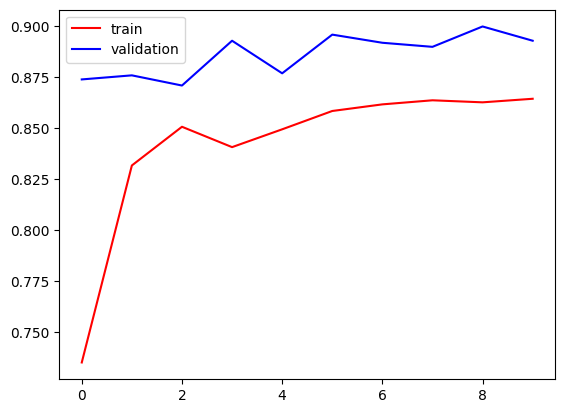

In [17]:

#Comparando as curvas de treinamento e teste, das variaveis (Accuracy e Val_Accuracy)
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


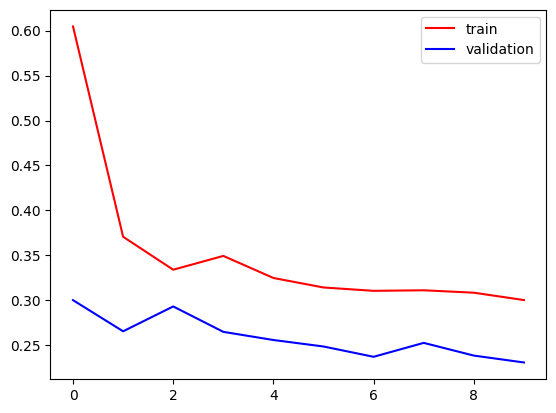

In [18]:
#COmparando as curvas de treinamento e teste, das variaveis (Loss e Val_Loss)
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
loss, accuracy = model.evaluate(test_generator)

# Imprimir os resultados
print("Loss:", loss)
print("Accuracy:", accuracy)

32/32 [==============================] - 177s 5s/step - loss: 0.2308 - accuracy: 0.8930
Loss: 0.23083335161209106
Accuracy: 0.8930000066757202
